### OPTIMIZACIÓN DE HIPERPARAMETROS PARA RANDOM FOREST 

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import pandas as pd


### Punto 3.1

In [27]:
digits = datasets.load_digits()

In [28]:
print(digits.data)
print(digits.target)
print(digits.images[0])


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [29]:
X = digits.data
Y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### Optimizacion de hiperparametros usando busqueda de grilla

In [30]:
import numpy as np  
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

#Creamos la grilla con los parametros a seleccionar
param_grid = {
    'n_estimators': np.arange(10, 50, 10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 10, 20]
}

#Defimos el clasificador base
base_estimator =RandomForestClassifier(random_state=0)
#Realizamos la busqueda de los hiperparametros
RF_gridSearch = GridSearchCV(base_estimator, param_grid)
#Nota: no se olviden de invocar el metodo para entrenar .fit
RF_gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 10, 20],
                         'n_estimators': array([10, 20, 30, 40])})

In [31]:
#Podemos ver que parametros fueron los seleccionados
RF_gridSearch.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': np.int64(40)}

In [32]:
#Usamos el clasificador y analizamos su precision
y_pred = RF_gridSearch.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9629629629629629


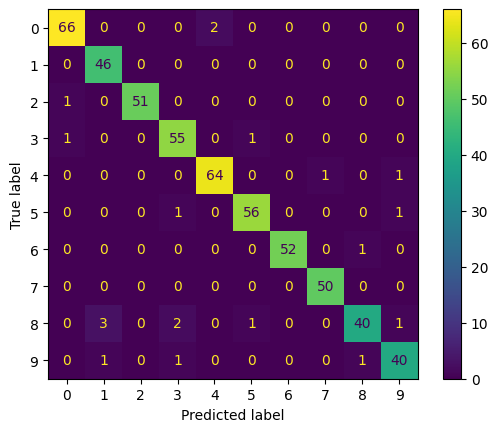

In [33]:
#matriz de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_gridSearch.best_estimator_.classes_)  
disp.plot()

#### Optimizacion de hiperparametros usando busqueda aleatoria

In [34]:
#Ahora, vamos a seleccionar los hiperparametros empleando busqueda aleatoria
#este tipo de optimizador tambien se encuentra en sklearn
from sklearn.model_selection import RandomizedSearchCV
#Creamos la grilla de hiperparametros, entre las cuales se seleccionara de forma
#aleatoria la mejor configuracion
param_grid = {'n_estimators': np.arange(10, 100, 10),
                'criterion': ['gini', 'entropy'],
                'max_depth': [3, 5, 10, 20]}

#Definimos el clasificador base
base_estimator =RandomForestClassifier(random_state=0)
#Seleccionamos los hiperparametros
RF_randomSearch = RandomizedSearchCV(base_estimator, param_grid, n_iter=15)
#Nota: despues de emplear RandomizedSearchVC tambien se requiere entrenar
#el modelo
RF_randomSearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [35]:
#Revisamos los parametros seleccionados
RF_randomSearch.best_params_

{'n_estimators': np.int64(80), 'max_depth': 10, 'criterion': 'gini'}

In [36]:
#Calculamos la precision
y_pred=RF_randomSearch.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9740740740740741


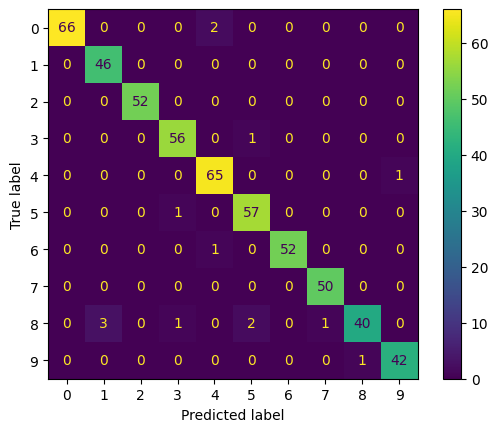

In [37]:
#Calculamos la matriz de confusion
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=RF_gridSearch.best_estimator_.classes_)
disp.plot()

### Punto 3.2

In [38]:
### 
data = datasets.fetch_california_housing()

In [39]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [40]:
X2=data.data
Y2=data.target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3)

#### Optimizacion de hiperparametros usando busqueda de grilla

In [47]:
from sklearn.ensemble import RandomForestRegressor
#Creamos la grilla con los parametros a seleccionar
param_grid = {
    'n_estimators': np.arange(10, 50, 10), 
    'max_depth': [1, 2, 8, None],          
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],                  
    'criterion': ['squared_error', 'absolute_error']  
}


#Defimos el clasificador base
base_estimator =RandomForestRegressor(random_state=0)
#Realizamos la busqueda de los hiperparametros
RF_gridSearch = GridSearchCV(base_estimator, param_grid)
#Nota: no se olviden de invocar el metodo para entrenar .fit
RF_gridSearch.fit(X_train2, y_train2)

KeyboardInterrupt: 

In [ ]:
#Podemos ver que parametros fueron los seleccionados
RF_gridSearch.best_params_

In [ ]:
#Usamos el clasificador y analizamos su precision
y_pred = RF_gridSearch.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#matriz de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_gridSearch.best_estimator_.classes_)  
disp.plot()

In [ ]:
#Ahora, vamos a seleccionar los hiperparametros empleando busqueda aleatoria
#este tipo de optimizador tambien se encuentra en sklearn
from sklearn.model_selection import RandomizedSearchCV
#Creamos la grilla de hiperparametros, entre las cuales se seleccionara de forma
#aleatoria la mejor configuracion
param_grid = {
    'n_estimators': np.arange(10, 100, 10),           
    'max_depth': [3, 5, 10, 20, None],                 
    'min_samples_split': [2, 5, 10],                   
    'min_samples_leaf': [1, 2, 4],                     
    'criterion': ['squared_error', 'absolute_error']   
}
#Definimos el clasificador base
base_estimator =RandomForestRegressor(random_state=0)
#Seleccionamos los hiperparametros
RF_randomSearch = RandomizedSearchCV(base_estimator, param_grid, n_iter=15)
#Nota: despues de emplear RandomizedSearchVC tambien se requiere entrenar
#el modelo
RF_randomSearch.fit(X_train, y_train)

In [ ]:
#Revisamos los parametros seleccionados
RF_randomSearch.best_params_

In [ ]:
#Calculamos la precision
y_pred=RF_randomSearch.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Calculamos la matriz de confusion
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=RF_gridSearch.best_estimator_.classes_)
disp.plot()